<a href="https://colab.research.google.com/github/cjsdudwls1/simple_things/blob/main/%EA%B5%AD%EA%B0%80%EB%B3%84_1%EC%9D%B8%EB%8B%B9_%EC%9D%98%EB%A3%8C%EB%B9%84_%EC%A7%80%EC%B6%9C_%EB%B0%8F_%EA%B8%B0%EB%8C%80%EC%88%98%EB%AA%85_%EA%B0%84_%EA%B4%80%EA%B3%84_%EB%B6%84%EC%84%9D%EB%B3%B4%EA%B3%A0%EC%84%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **국가별 1인당 의료비 지출-기대수명 관계 분석 보고서**

In [26]:
import matplotlib.pyplot as plt

In [27]:
import seaborn as sns
df = sns.load_dataset('healthexp')
df

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


## **전체국가**

In [29]:
 countries = df['Country'].unique()
 print(f"전체 국가: {', '.join(countries)}")

전체 국가: Germany, France, Great Britain, Japan, USA, Canada


## **언제부터?**

In [28]:
start_year = df['Year'].min()
print(f"시작 연도: {start_year}")

시작 연도: 1970


## **특정 연도 범위를 선택하여 데이터를 필터링**

In [30]:
df_filtered = df[df['Year'].between(2000, 2010)]
df_filtered

,Year,Country,Spending_USD,Life_Expectancy
148,2000,Canada,2450.593,79.1
149,2000,Germany,2895.533,78.2
150,2000,France,2687.530,79.2
151,2000,Great Britain,1897.202,77.9
152,2000,Japan,1847.786,81.2
...,...,...,...,...
209,2010,Germany,4423.070,80.5
210,2010,France,4045.065,81.8
211,2010,Great Britain,3441.710,80.6
212,2010,Japan,3169.190,82.9


## **국가별 요약통계**

In [31]:
df_by_country = df.groupby('Country').describe()
df_by_country

Year                                                            \
              count         mean        std     min      25%     50%      75%   
Country                                                                         
Canada         44.0  1998.318182  13.183451  1971.0  1987.75  1998.5  2009.25   
France         35.0  2001.857143  12.466763  1970.0  1994.50  2003.0  2011.50   
Germany        50.0  1995.080000  15.005904  1970.0  1982.25  1995.5  2007.75   
Great Britain  43.0  1998.627907  13.273718  1970.0  1988.50  1999.0  2009.50   
Japan          51.0  1995.000000  14.866069  1970.0  1982.50  1995.0  2007.50   
USA            51.0  1995.000000  14.866069  1970.0  1982.50  1995.0  2007.50   

                      Spending_USD               ...                         \
                  max        count         mean  ...         75%        max   
Country                                          ...                          
Canada         2020.0         44.0  2685.778341  ...  3998.28700   5828.324   
France         2020.0         35.0  3045.145057  ...  4230.56600   5468.418   
Germany        2020.0         50.0  2667.280200  ...  3904.04875   6938.983   
Great Britain  2020.0         43.0  2034.192465  ...  3388.10800   5018.700   
Japan          2020.0         51.0  1860.257902  ...  2744.55700   4665.641   
USA            2020.0         51.0  4388.570529  ...  7275.76950  11859.179   

              Life_Expectancy                                           \
                        count       mean       std   min     25%   50%   
Country                                                                  
Canada                   44.0  78.706818  2.502222  72.8  76.775  78.7   
France                   35.0  79.565714  2.862120  72.2  78.050  79.4   
Germany                  50.0  76.726000  3.473915  70.6  73.575  77.1   
Great Britain            43.0  77.620930  2.827548  71.9  75.350  77.5   
Japan                    51.0  79.554902  3.547242  72.0  76.950  79.8   
USA                      51.0  75.843137  2.336258  70.9  74.550  75.7   

                             
                  75%   max  
Country                      
Canada         80.975  82.2  
France         82.200  82.9  
Germany        80.175  81.3  
Great Britain  80.400  81.4  
Japan          82.650  84.7  
USA            77.950  78.9  

[6 rows x 24 columns]

## **국가별 평균 1인당 의료비 지출**

In [32]:
country_income_mean = df.groupby('Country')['Spending_USD'].mean().sort_values(ascending=False)
print("국가별 평균 1인당 의료비 지출:")
print(country_income_mean)

국가별 평균 1인당 의료비 지출:
Country
USA              4388.570529
France           3045.145057
Canada           2685.778341
Germany          2667.280200
Great Britain    2034.192465
Japan            1860.257902
Name: Spending_USD, dtype: float64


## **국가별 평균 기대수명**

In [ ]:
country_life_expectancy_mean = df.groupby('Country')['Life_Expectancy'].mean().sort_values(ascending=False)
print("국가별 평균 기대수명:")
print(country_life_expectancy_mean)

국가별 평균 기대수명:
Country
France           79.565714
Japan            79.554902
Canada           78.706818
Great Britain    77.620930
Germany          76.726000
USA              75.843137
Name: Life_Expectancy, dtype: float64


 ## **국가 및 연도별 1인당 의료비 지출 변화 추세**


/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

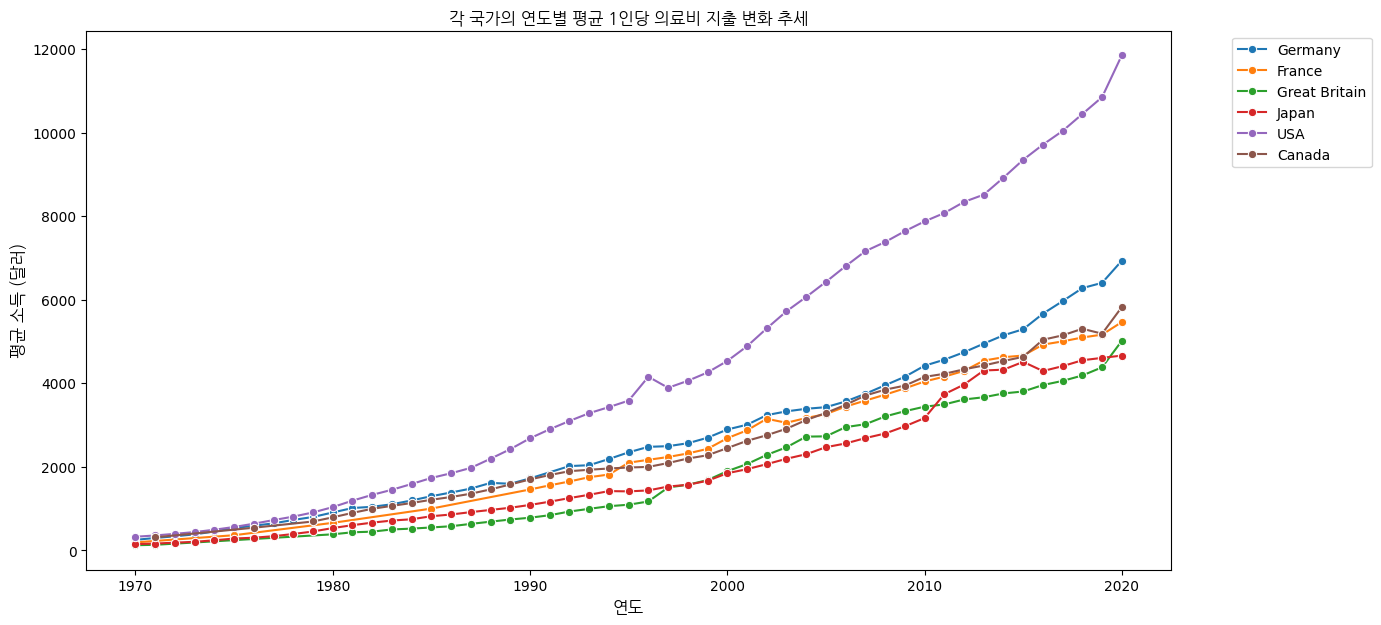

In [34]:
# 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import seaborn as sns

# 나눔고딕 폰트 설치 (코랩에서 한글 폰트가 없을 경우)
!pip install -q matplotlib==3.7.1
!apt-get -qq install -y fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib

# 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# matplotlib 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 그래프 그리기
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Spending_USD', hue='Country', data=df, marker='o')
plt.title('각 국가의 연도별 평균 1인당 의료비 지출 변화 추세', fontproperties=font_prop)
plt.ylabel('평균 소득 (달러)', fontproperties=font_prop)
plt.xlabel('연도', fontproperties=font_prop)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

## **국가의 연도별 기대수명 변화 추세**

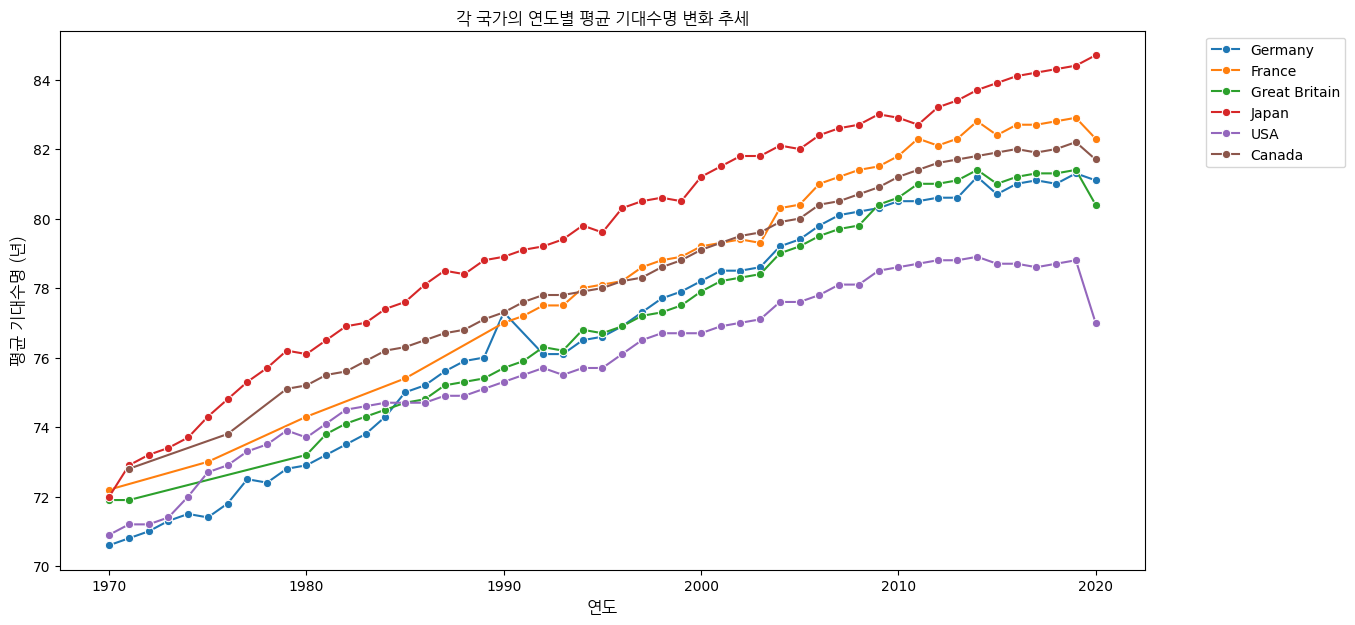

In [35]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Life_Expectancy', hue='Country', data=df, marker='o')
plt.title('각 국가의 연도별 평균 기대수명 변화 추세', fontproperties=font_prop)
plt.ylabel('평균 기대수명 (년)', fontproperties=font_prop)
plt.xlabel('연도', fontproperties=font_prop)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

## **연도별 전 세계 평균 1인당 의료비 지출과 기대수명 변화**
*   파란색 선 = 평균 1인당 의료비 지출.
*   주황색 선 = 평균 기대수명.



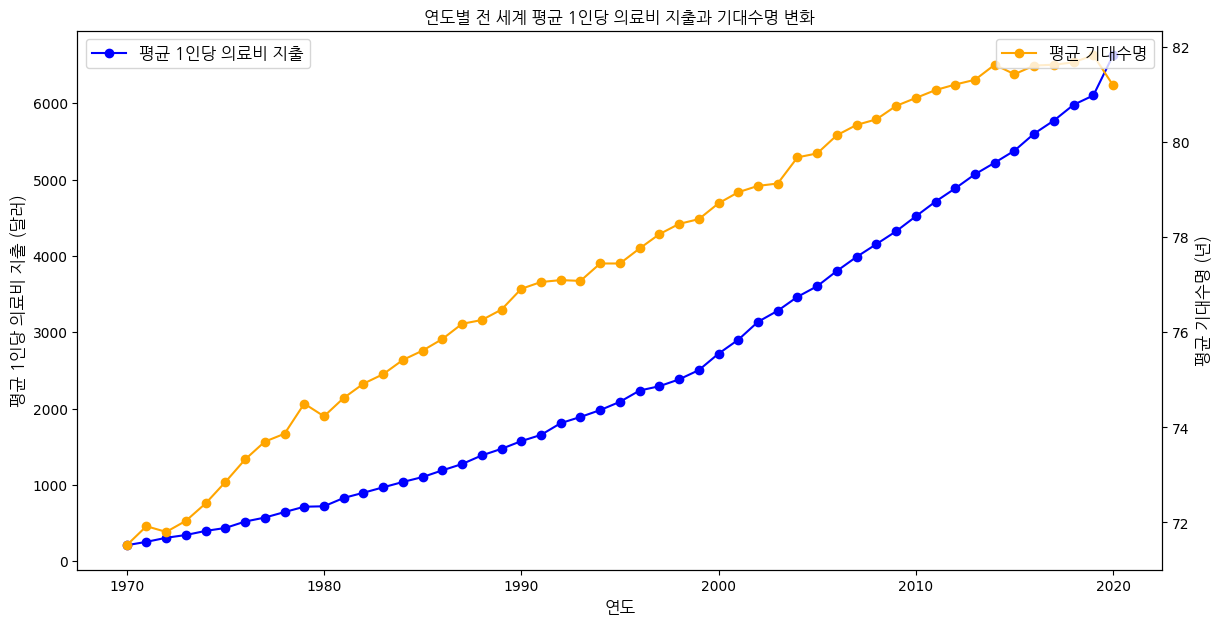

In [36]:
# 연도별 전 세계 평균 1인당 의료비 지출과 기대수명 변화
global_stats = df.groupby('Year').agg({
    'Spending_USD': 'mean',
    'Life_Expectancy': 'mean'
})

fig, ax1 = plt.subplots(figsize=(14, 7))

# 연도별 평균 1인당 의료비 지출 변화
global_stats['Spending_USD'].plot(kind='line', ax=ax1, color='blue', marker='o', label='평균 1인당 의료비 지출')
ax1.set_ylabel('평균 1인당 의료비 지출 (달러)', fontproperties=font_prop)
ax1.set_xlabel('연도', fontproperties=font_prop)
ax1.set_title('연도별 전 세계 평균 1인당 의료비 지출과 기대수명 변화', fontproperties=font_prop)

# 연도별 평균 기대수명 변화 (2차 축)
ax2 = ax1.twinx()
global_stats['Life_Expectancy'].plot(kind='line', ax=ax2, color='orange', marker='o', label='평균 기대수명')
ax2.set_ylabel('평균 기대수명 (년)', fontproperties=font_prop)

# 범례 추가
ax1.legend(loc='upper left', prop=font_prop)
ax2.legend(loc='upper right', prop=font_prop)

plt.show()

## **1인당 의료비 지출과 기대수명 산점도 및 회귀선**
(회귀선 상승 = 평균 1인당 의료비 지출이 증가할수록 평균 기대수명도 증가.)

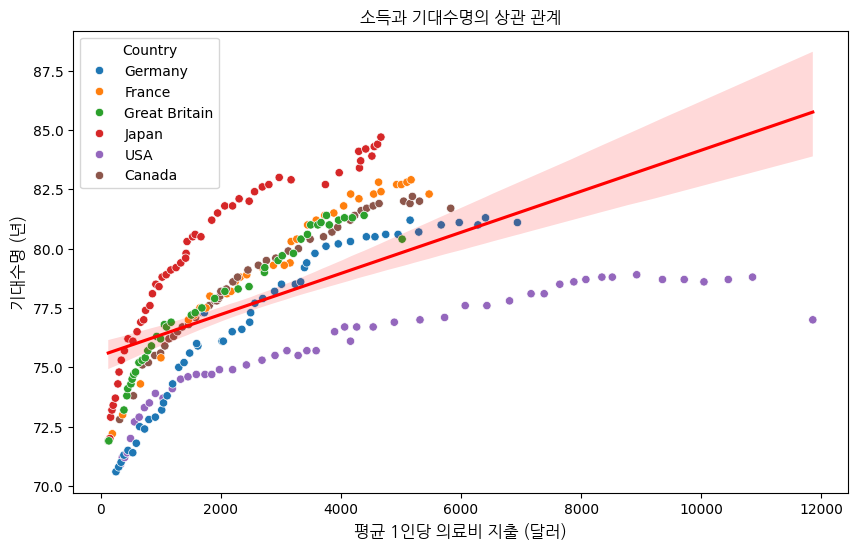

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Spending_USD', y='Life_Expectancy', hue='Country', data=df)
sns.regplot(x='Spending_USD', y='Life_Expectancy', data=df, scatter=False, color='red')
plt.title('소득과 기대수명의 상관 관계', fontproperties=font_prop)
plt.xlabel('평균 1인당 의료비 지출 (달러)', fontproperties=font_prop)
plt.ylabel('기대수명 (년)', fontproperties=font_prop)
plt.show()

## **상관계수 해석**

In [38]:
# 상관 계수 계산
correlation = df[['Spending_USD', 'Life_Expectancy']].corr()
corr_value = correlation.loc['Spending_USD', 'Life_Expectancy']

# 상관 계수 해석 및 설명 출력
def interpret_correlation(value):
    if value > 0.7:
        return "강한 양의 상관 관계 (1인당 의료비 지출이 높을수록 기대수명이 높음)"
    elif value > 0.3:
        return "중간 정도의 양의 상관 관계 (1인당 의료비 지출이 높을수록 기대수명이 높아지는 경향이 있음)"
    elif value > 0:
        return "약한 양의 상관 관계 (1인당 의료비 지출이 높을수록 기대수명이 약간 높아지는 경향이 있음)"
    elif value > -0.3:
        return "약한 음의 상관 관계 (1인당 의료비 지출이 높을수록 기대수명이 약간 낮아지는 경향이 있음)"
    elif value > -0.7:
        return "중간 정도의 음의 상관 관계 (1인당 의료비 지출이 높을수록 기대수명이 낮아지는 경향이 있음)"
    else:
        return "강한 음의 상관 관계 (1인당 의료비 지출이 높을수록 기대수명이 낮음)"

correlation_explanation = interpret_correlation(corr_value)
print("1인당 의료비 지출과 기대수명의 상관 계수: {:.2f}".format(corr_value))
print("해석: " + correlation_explanation)


1인당 의료비 지출과 기대수명의 상관 계수: 0.58
해석: 중간 정도의 양의 상관 관계 (1인당 의료비 지출이 높을수록 기대수명이 높아지는 경향이 있음)


## **1인당 의료비 지출과 기대수명의 비율 계산 및 비교**
 (비율이 높을수록 1인당 의료비 지출에 비해 기대수명이 짧음.)

<ipython-input-39-42ab70780c0d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Country', y='Income_Life_Expectancy_Ratio', data=df, estimator='mean', ci=None)


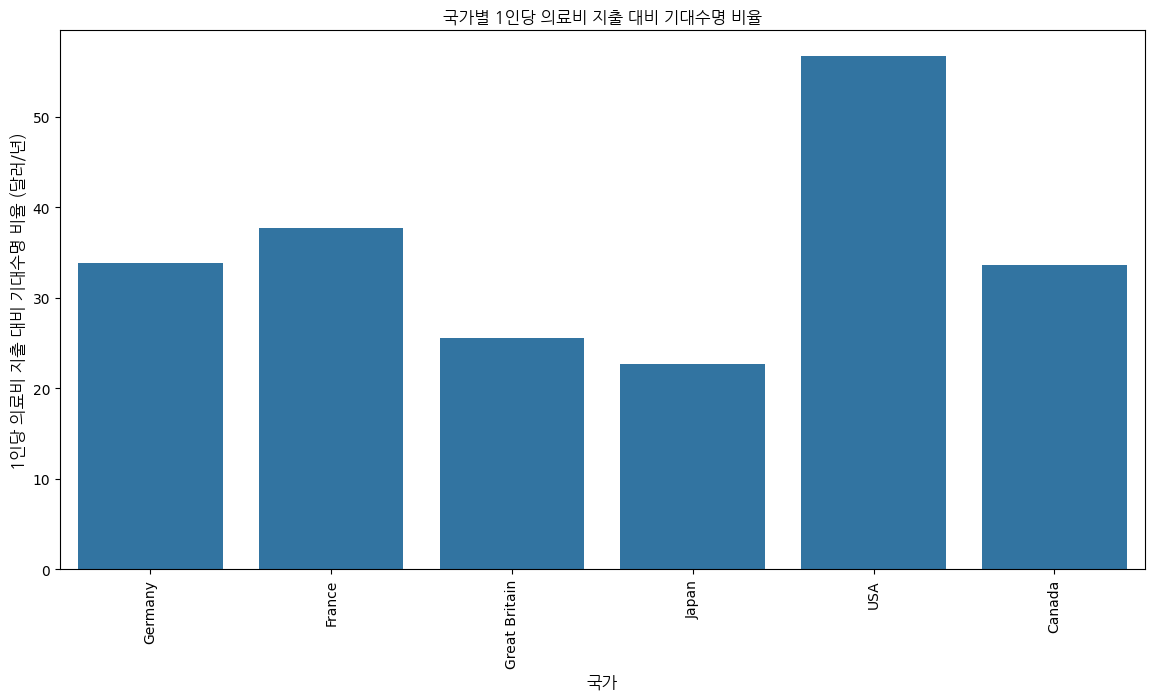

In [39]:
df['Income_Life_Expectancy_Ratio'] = df['Spending_USD'] / df['Life_Expectancy']
plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Income_Life_Expectancy_Ratio', data=df, estimator='mean', ci=None)
plt.title('국가별 1인당 의료비 지출 대비 기대수명 비율', fontproperties=font_prop)
plt.ylabel('1인당 의료비 지출 대비 기대수명 비율 (달러/년)', fontproperties=font_prop)
plt.xlabel('국가', fontproperties=font_prop)
plt.xticks(rotation=90)
plt.show()

# **결론**

본 연구에서는 다양한 국가의 연도별 **1인당 의료비 지출과 기대수명 간의 관계**를 분석.  
그 결과, **1인당 의료비 지출이 증가할수록 기대수명도 증가하는 경향**이 확인되었으며, 이는 **중간 정도의 양의 상관관계(0.58)** 를 보임.  

## **주요 발견**  
- **일본, 프랑스**  
  - 비교적 적은 의료비 지출에도 **높은 기대수명** 유지.  
- **미국**  
  - 높은 의료비 지출에도 불구하고 **기대수명 증가 폭이 낮음**.  
  - 의료 시스템, 생활 방식, 정책적 차이가 영향을 미칠 가능성.  
- **소득 대비 기대수명 비율 분석**  
  - 의료비 지출이 증가하더라도 기대수명 증가 효과가 제한적인 국가 존재.  
  - 공공의료 정책, 식습관, 건강관리 시스템 등이 기대수명에 중요한 역할.  

## **시사점**  
- 기대수명 증가를 위해 **단순한 의료비 지출 증가가 아닌 종합적 접근 필요**.  
  - **보건 정책 개선**  
  - **건강한 생활 습관 유도**  
  - **의료 서비스의 효율적 운영**  
- 향후 연구에서는 **다양한 요인을 정량적으로 분석하여 정책적 시사점 도출**이 필요.

본 연구 결과는 각 국가의 보건 정책 수립과 의료 시스템 개선을 위한 중요한 참고자료로 활용될 수 있을 것으로 보임.